# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | masuguru
Processing Record 5 of Set 1 | cambria
Processing Record 6 of Set 1 | kamikawa
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | hadibu
Processing Record 10 of Set 1 | posto fiscal rolim de moura
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | nguruka
Processing Record 13 of Set 1 | lihue
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | nemuro
Processing Record 16 of Set 1 | akureyri
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | amasra
Processing Record 19 of Set 1 | amga
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | ust'-ilimsk
Processing Record 22 of Set 1 | papatowai
Process

Processing Record 38 of Set 4 | sao vicente
Processing Record 39 of Set 4 | vizinga
Processing Record 40 of Set 4 | nadi
Processing Record 41 of Set 4 | samut prakan
Processing Record 42 of Set 4 | general acha
Processing Record 43 of Set 4 | okhotsk
Processing Record 44 of Set 4 | qarqaraly
Processing Record 45 of Set 4 | hualien city
Processing Record 46 of Set 4 | avarua
Processing Record 47 of Set 4 | marquette
Processing Record 48 of Set 4 | wailua homesteads
Processing Record 49 of Set 4 | magdagachi
Processing Record 0 of Set 5 | kargopol'
Processing Record 1 of Set 5 | utrik
Processing Record 2 of Set 5 | dryden
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | taiohae
City not found. Skipping...
Processing Record 5 of Set 5 | kavarna
Processing Record 6 of Set 5 | dhidhdhoo
Processing Record 7 of Set 5 | talnakh
Processing Record 8 of Set 5 | badger
Processing Record 9 of Set 5 | kuandian
Processing Record 10 of Set 5 | nakhchivan
Processing Record 

Processing Record 30 of Set 8 | qacha's nek
Processing Record 31 of Set 8 | mossendjo
Processing Record 32 of Set 8 | midvagur
Processing Record 33 of Set 8 | ancud
Processing Record 34 of Set 8 | flying fish cove
Processing Record 35 of Set 8 | richards bay
Processing Record 36 of Set 8 | atar
Processing Record 37 of Set 8 | sergeyevka
Processing Record 38 of Set 8 | klaksvik
Processing Record 39 of Set 8 | el porvenir
Processing Record 40 of Set 8 | zakynthos
Processing Record 41 of Set 8 | kaoma
Processing Record 42 of Set 8 | almazan
Processing Record 43 of Set 8 | teknaf
Processing Record 44 of Set 8 | tchintabaraden
Processing Record 45 of Set 8 | laayoune
Processing Record 46 of Set 8 | kailua-kona
Processing Record 47 of Set 8 | crane
Processing Record 48 of Set 8 | ialibu
Processing Record 49 of Set 8 | kolyshley
Processing Record 0 of Set 9 | weno
Processing Record 1 of Set 9 | tosontsengel
Processing Record 2 of Set 9 | rio preto da eva
Processing Record 3 of Set 9 | brindis

Processing Record 21 of Set 12 | tamarin
Processing Record 22 of Set 12 | goldap
Processing Record 23 of Set 12 | zlatoust
Processing Record 24 of Set 12 | novyy urgal
Processing Record 25 of Set 12 | igra
Processing Record 26 of Set 12 | sanctuary point
Processing Record 27 of Set 12 | cam ranh
Processing Record 28 of Set 12 | le muy
Processing Record 29 of Set 12 | itaporanga
Processing Record 30 of Set 12 | kyaikto
Processing Record 31 of Set 12 | weihai
Processing Record 32 of Set 12 | nova vicosa
Processing Record 33 of Set 12 | new norfolk
Processing Record 34 of Set 12 | castillos
Processing Record 35 of Set 12 | hobyo
Processing Record 36 of Set 12 | gizo
Processing Record 37 of Set 12 | puerto colombia
Processing Record 38 of Set 12 | hihifo
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [11]:
# Display sample data
city_data_df.head(25)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,17.16,99,100,1.54,ZA,1683839576
1,ushuaia,-54.8000,-68.3000,9.81,57,75,5.14,AR,1683839577
2,grytviken,-54.2811,-36.5092,-4.16,76,12,4.84,GS,1683839577
3,masuguru,-11.3667,38.4167,24.23,68,98,1.63,TZ,1683839577
4,cambria,35.5641,-121.0808,25.86,77,9,2.68,US,1683839578
5,kamikawa,43.8400,142.7711,3.69,72,51,1.47,JP,1683839578
6,blackmans bay,-43.0167,147.3167,8.19,85,100,2.84,AU,1683839578
7,ribeira grande,38.5167,-28.7000,15.99,82,2,2.24,PT,1683839578
8,hadibu,12.6500,54.0333,28.73,71,91,1.21,YE,1683839358


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,17.16,99,100,1.54,ZA,1683839576
1,ushuaia,-54.8000,-68.3000,9.81,57,75,5.14,AR,1683839577
2,grytviken,-54.2811,-36.5092,-4.16,76,12,4.84,GS,1683839577
3,masuguru,-11.3667,38.4167,24.23,68,98,1.63,TZ,1683839577
4,cambria,35.5641,-121.0808,25.86,77,9,2.68,US,1683839578


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

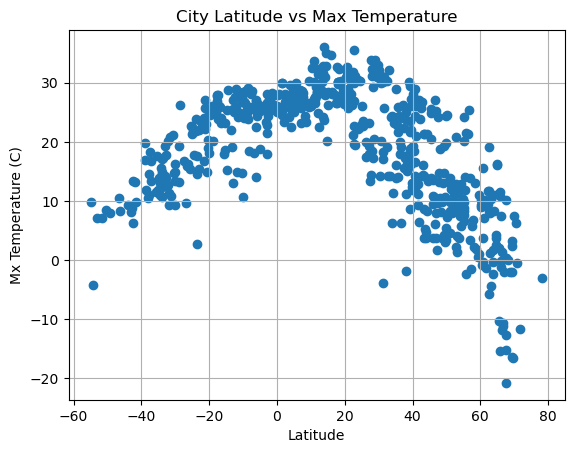

In [21]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Mx Temperature (C)")
plt.title(f"City Latitude vs Max Temperature")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

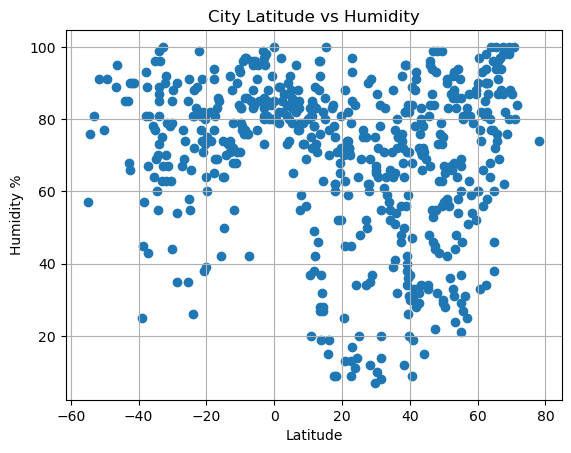

In [23]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude vs Humidity")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

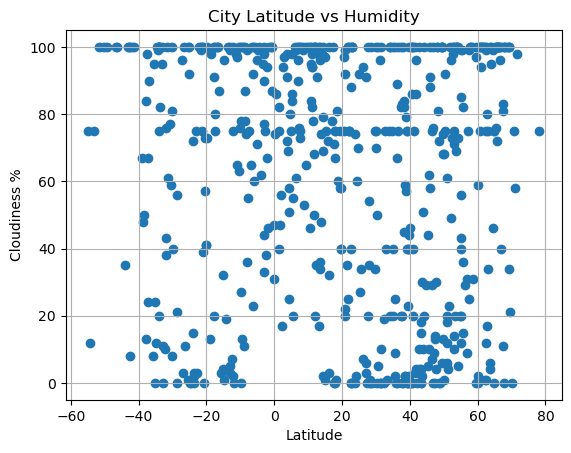

In [24]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title(f"City Latitude vs Humidity")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

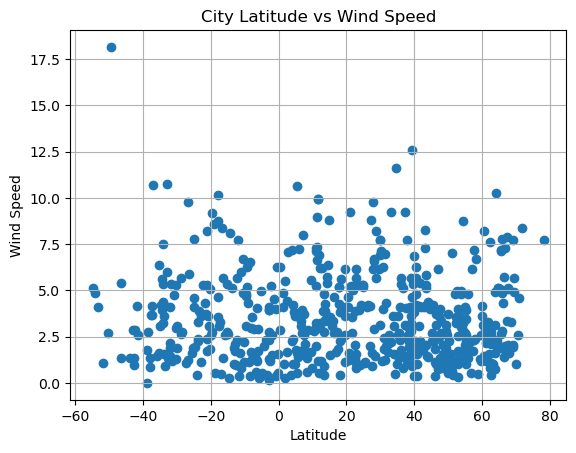

In [26]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude vs Wind Speed")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def LinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    regress_values = x_values * slope + intercept
                               
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,cambria,35.5641,-121.0808,25.86,77,9,2.68,US,1683839578
5,kamikawa,43.8400,142.7711,3.69,72,51,1.47,JP,1683839578
7,ribeira grande,38.5167,-28.7000,15.99,82,2,2.24,PT,1683839578
8,hadibu,12.6500,54.0333,28.73,71,91,1.21,YE,1683839358
12,lihue,21.9789,-159.3672,26.58,72,75,5.14,US,1683839166


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,17.16,99,100,1.54,ZA,1683839576
1,ushuaia,-54.8000,-68.3000,9.81,57,75,5.14,AR,1683839577
2,grytviken,-54.2811,-36.5092,-4.16,76,12,4.84,GS,1683839577
3,masuguru,-11.3667,38.4167,24.23,68,98,1.63,TZ,1683839577
6,blackmans bay,-43.0167,147.3167,8.19,85,100,2.84,AU,1683839578


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.80


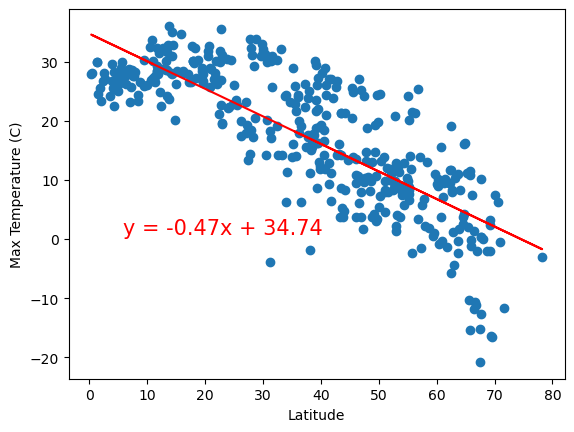

In [76]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

print(f"The r-value is: {rvalue:.2f}")


The r-value is: 0.78
y = 0.38x + 27.85


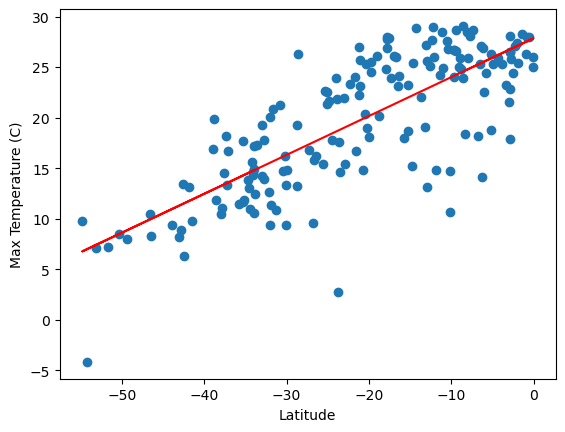

In [80]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

print(f"The r-value is: {rvalue:.2f}")
print(line_eq)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08
y = 0.1x + 62.33


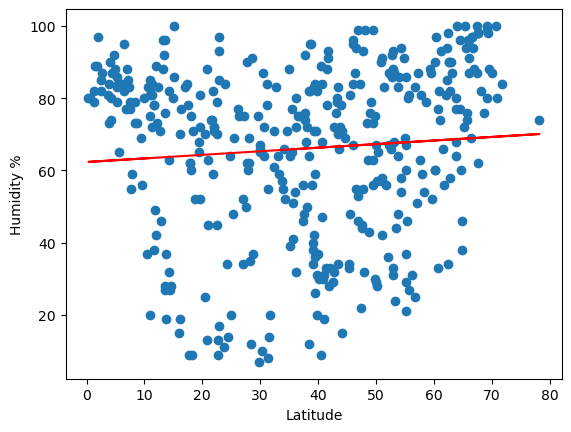

In [79]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

print(f"The r-value is: {rvalue:.2f}")
print(line_eq)

The r-value is: 0.19
y = 0.22x + 81.8


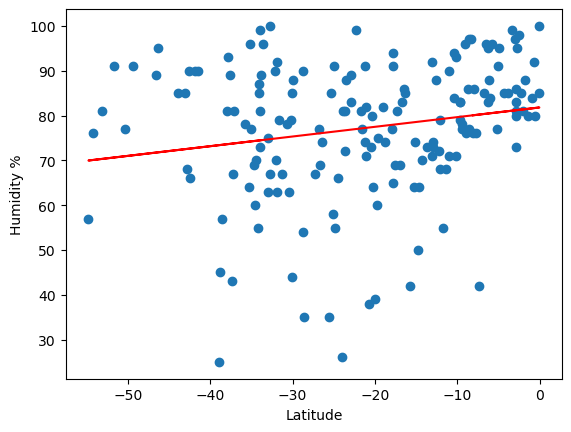

In [81]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

print(f"The r-value is: {rvalue:.2f}")
print(line_eq)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.05


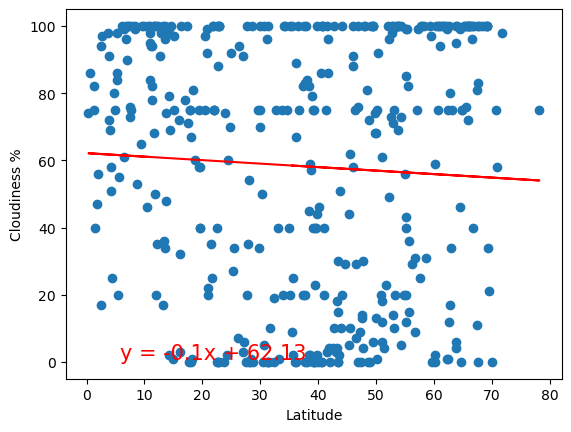

In [70]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

print(f"The r-value is: {rvalue:.2f}")
print(line_eq)

The r-value is: 0.04
y = 0.11x + 66.39


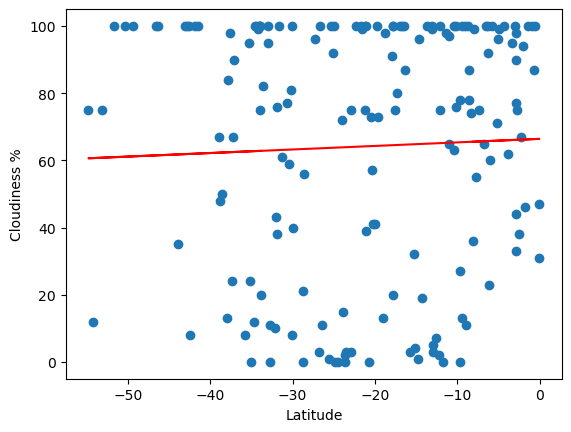

In [82]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

print(f"The r-value is: {rvalue:.2f}")
print(line_eq)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.09
y = -0.01x + 3.88


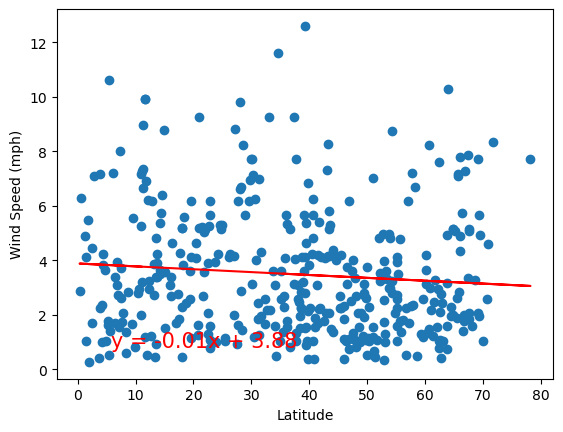

In [83]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-value is: {rvalue:.2f}")
print(line_eq)

The r-value is: -0.14
y = -0.03x + 2.87


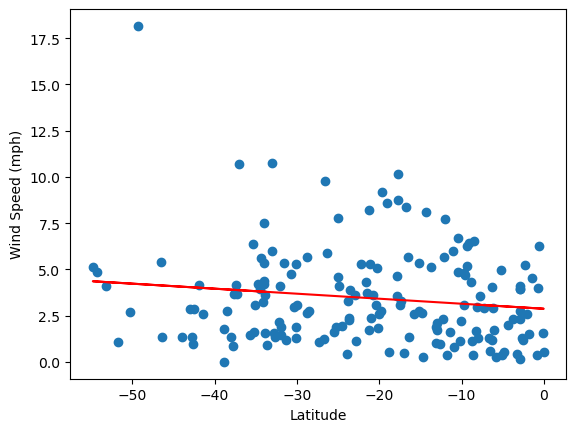

In [84]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5.8, 0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-value is: {rvalue:.2f}")
print(line_eq)

**Discussion about the linear relationship:** YOUR RESPONSE HERE